# 📌 Integrated Approach to Sentiment Analysis: Leveraging Neural Networks

# Step 1: Import Required Libraries

Before we begin building our deep learning model, we need to **import essential libraries** that will help in data preprocessing, model training, and evaluation.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os



| Library                 | Purpose                                                                 |
|-------------------------|-------------------------------------------------------------------------|
| TensorFlow & Keras      | Used to build and train neural network models.                          |
| Sequential (Keras)      | Helps in defining our deep learning model as a sequence of layers.      |
| Embedding Layer         | Converts words into dense vector representations for better text understanding. |
| GlobalAveragePooling1D  | Reduces the dimensionality of text embeddings efficiently.              |
| Dropout Layer           | Helps prevent overfitting by randomly deactivating neurons during training. |
| Tokenizer & pad_sequences | Converts text into numerical format so it can be used by neural networks. |
| ModelCheckpoint         | Saves the best model during training to avoid losing progress.          |
| LabelEncoder (Sklearn)  | Converts categorical sentiment labels into numerical values for model training. |
| Classification Metrics (Sklearn) | Helps evaluate model performance using accuracy, confusion matrix, and classification report. |
| Matplotlib & Seaborn   | Used to visualize model performance (e.g., accuracy, confusion matrices). |
| Pandas                  | Handles dataset manipulation efficiently.                               |
| OS                      | Used to manage files and directories in Colab.                          |
|Numpy                      | Used to handle numerical data efficiently (e.g. tensor manipulation, weight initialization, activation functions, loss and accuracy calculations)                          |







**🔹 Why This Implementation?**

✔ **Neural Networks perform better** on text-based classification tasks compared to classic ML models.

✔ **Tokenization and Embedding Layers** are crucial for handling textual data.

✔ **Dropout Regularization** helps avoid overfitting and improves generalization.

✔ **Checkpointing ensures** that we don’t lose the best-trained model.

✔ **Evaluation Metrics like Accuracy & Confusion Matrix** provide a clear picture of model performance.

# Step 2: Mount Google Drive & Load Dataset

Before proceeding with model training, we need to **mount Google Drive** to access our dataset (```labeled_reddit_comments.csv```). This ensures that we can load and manipulate the data in our Colab environment.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('drive/MyDrive/labeled_reddit_comments.csv')
# This line reads the preprocessed dataset containing Reddit comments and sentiment labels into a Pandas DataFrame.
# This dataset was created in our previous notebook, where we labeled comments using classic ML models.

In [ ]:
# Print column names to verify
print(df.columns)

# This ensures that the dataset is loaded correctly and contains the expected columns (e.g., cleaned_comment, Label).
# Helps identify any missing or misnamed columns before proceeding with preprocessing.

Index(['Title', 'Comment', 'cleaned_comment', 'Cluster', 'Label', 'svd-one',
       'svd-two'],
      dtype='object')


# Step 3: Load and Prepare Data

Before training our deep learning model, we need to **process the text data** into a format that can be used for training. Unlike traditional machine learning models, neural networks require numerical inputs.

In this step, we will:

1. **Handle missing values** to ensure data consistency.
2. **Tokenize text data** to convert words into numerical representations.
3. **Pad sequences** to ensure uniform input size for the model.
4. **Encode labels** to transform categorical sentiment labels into numerical values.
5. **Split the dataset** into training and testing sets.

In [ ]:
# Assuming 'Comment' column contains your text data and 'Label' contains labels
X = df['Comment'].astype(str)  # Ensure all elements are strings
y = df['Label']

# Handle missing values if any
X.fillna('', inplace=True)  # Replace NaNs with empty string

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the comments
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_tokenized = tokenizer.texts_to_sequences(X_train)
X_test_tokenized = tokenizer.texts_to_sequences(X_test)

max_len = max([len(x) for x in X_train_tokenized])
X_train_padded = pad_sequences(X_train_tokenized, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_tokenized, maxlen=max_len, padding='post')

# Encode labels if needed (for example, if 'Label' is categorical)
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# Get the number of unique labels (num_clusters)
num_clusters = len(encoder.classes_)

**🔹 Load and Handle Missing Values**

```
# Assuming 'Comment' column contains your text data and 'Label' contains labels
X = df['Comment'].astype(str)  # Ensure all elements are strings
y = df['Label']

# Handle missing values if any
X.fillna('', inplace=True)  # Replace NaNs with empty string
```
✅ Why Handle Missing Values?

Missing values in text data can cause errors during tokenization and training. **Replacing NaNs with an empty string ensures the model does not encounter unexpected issues.**

=================================================================================================================

🔹 **Split Data into Training and Testing Sets**
```
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```
✅ Why Split the Data?

We need to evaluate our model on **unseen data** to measure its performance.

  * **80% Training Data**: Used to train the model.
  * **20% Test Data**: Used to evaluate model performance.
  * **random_state=42** ensures results are **reproducible** across different runs.

=================================================================================================================

🔹 **Tokenize Text Data**
```
# Tokenize the comments
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_tokenized = tokenizer.texts_to_sequences(X_train)
X_test_tokenized = tokenizer.texts_to_sequences(X_test)
```
✅ Why Use Tokenization?

Neural networks cannot process raw text. **Tokenization converts words into numerical indices**, allowing the model to recognize patterns in text.

  * ```fit_on_texts(X_train)``` builds a vocabulary **only on training data**, preventing data leakage.
  * ```texts_to_sequences()``` converts each comment into a sequence of word indices.

=================================================================================================================

🔹 **Pad Sequences**
```
max_len = max([len(x) for x in X_train_tokenized])  # Find longest sequence length
X_train_padded = pad_sequences(X_train_tokenized, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_tokenized, maxlen=max_len, padding='post')
```
✅ Why Use Padding?

Neural networks require **fixed-size inputs**, but sentences vary in length.

  * **Padding ensures uniform input size** by adding zeros to shorter sequences.
  * ```maxlen=max_len``` sets all sequences to match the longest one.
  * ```padding='post'``` appends zeros at the end of shorter sequences, rather than the beginning.

=================================================================================================================

🔹** Encode Labels**
```
# Encode labels if needed (for example, if 'Label' is categorical)
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)
```
✅ Why Use Label Encoding?

Most machine learning models, including neural networks, **cannot process categorical data** like ```'positive'```, ```'negative'```, or ```'neutral'```.

  * **Label encoding converts categories into numbers** (e.g., ```positive → 0```, ```negative → 1```, ```neutral → 2```).
  * ```fit_transform(y_train)``` assigns numerical values based on training data.
  * ```transform(y_test)``` applies the same encoding to test data.

📝 *If we had many labels or wanted probabilities instead of class numbers, one-hot encoding might be a better option.*

=================================================================================================================

**🔹 Get the Number of Unique Labels**
```
# Get the number of unique labels (num_clusters)
num_clusters = len(encoder.classes_)
```
✅ Why Find the Number of Labels?

  * This determines the **number of output neurons** in our neural network.
  * If we have 3 sentiment categories (```positive```, ```negative```, ```neutral```), then our output layer needs **3 neurons**.

=================================================================================================================

**📌 Summary of This Step**

✅ **Processed text data**

✅ **Tokenized and padded sequences** for neural network compatibility

✅ **Encoded sentiment labels** into numerical form

✅ **Split dataset** into training and testing sets

# Step 4: Define and Compile the Model
Now that our data is preprocessed, we define the **neural network architecture** for text classification.

In [ ]:
def create_model():
    model = Sequential([
        Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_len),
        GlobalAveragePooling1D(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(num_clusters, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_model()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


**🔍 Breaking Down the Model Architecture**

| Layer                           | Purpose |
|---------------------------------|-----------------------------------------------------------------------------------------------------------------------------------|
| Embedding Layer                 | Converts word indices into dense vector representations (word embeddings). |
| GlobalAveragePooling1D Layer    | Reduces dimensionality by averaging over all word embeddings, making computation efficient. |
| Dense (128, ReLU)               | Fully connected layer with 128 neurons and ReLU activation. Helps the model learn patterns. |
| Dropout (0.5)                   | Drops 50% of neurons during training to prevent overfitting. |
| Dense (64, ReLU)                | Another fully connected layer for deeper feature extraction. |
| Dropout (0.5)                   | Additional regularization to improve generalization. |
| Dense (num_clusters, Softmax)   | Output layer with num_clusters neurons, one for each sentiment class (e.g., positive, negative, neutral). Uses softmax for multi-class classification. |



✅ Why Use These Layers?

  * **Embedding Layer**: Transforms words into dense vectors, capturing relationships between words.
  * **GlobalAveragePooling1D**: Instead of using LSTMs or CNNs (which require more computation), this reduces input size efficiently.
  * **Dense Layers with ReLU**: Help capture complex patterns in the data.
  * **Dropout Layers**: Prevent overfitting by randomly deactivating neurons during training.
  * **Softmax Activation in Output Layer**: Converts outputs into probability scores for each sentiment class.

**🔹 Compiling the Model**
```
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
```
✅ **Adam Optimizer**: Efficient adaptive learning rate optimizer.

✅ **Sparse Categorical Crossentropy**: Suitable for multi-class classification when labels are integer-encoded.

✅ **Accuracy Metric**: Used to track performance during training.


=================================================================================================================

**📌 Summary of This Step**

✅ **Defined a sequential neural network **for sentiment classification.

✅ **Used word embeddings for better text representation.**

✅ **Added dropout layers to improve generalization.**

✅ **Compiled the model with appropriate loss and optimizer.**

# Step 5: Train the Model with Validation and Model Checkpointing
Now that we've defined our neural network, we **train it** while incorporating **validation** and **model checkpointing** to save the best model.

In [ ]:
# Define checkpoint callback to save the best model
checkpoint_path = '/content/drive/MyDrive/models/best_model.keras'
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# Train the model with validation split and using callbacks
history = model.fit(X_train_padded, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2, callbacks=[checkpoint])

Epoch 1/10
2212/2212 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8741 - loss: 0.4989
Epoch 1: val_loss improved from inf to 0.45322, saving model to /content/drive/MyDrive/models/best_model.keras
2212/2212 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8741 - loss: 0.4989 - val_accuracy: 0.8817 - val_loss: 0.4532
Epoch 2/10
2207/2212 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8792 - loss: 0.4579
Epoch 2: val_loss improved from 0.45322 to 0.44424, saving model to /content/drive/MyDrive/models/best_model.keras
2212/2212 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.8792 - loss: 0.4579 - val_accuracy: 0.8817 - val_loss: 0.4442
Epoch 3/10
2202/2212 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8768 - loss: 0.4596
Epoch 3: val_loss improved from 0.44424 to 0.44328, saving model to /content/drive/MyDrive/models/best_model.keras
2212/2212 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8768 - loss: 0.4596 - val_accuracy: 0.8817 - val_loss: 0.4433
Epoch 4/10
2203/2212 ━━━━━━━━━━━━━━

**🔹 Implementing Model Checkpointing**

To ensure we save the best-performing model (based on validation loss), we use **ModelCheckpoint** from Keras.

```
# Define checkpoint callback to save the best model
checkpoint_path = '/content/drive/MyDrive/models/best_model.h5'
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
```

✅ Why Save the Best Model?

  * Prevents **overwriting with a worse model** in later epochs.
  * Helps in **early stopping**—if training starts degrading, we can restore the best checkpoint.
  * Ensures that **even if training is interrupted**, the best version of the model is preserved.

🔹**Training the Model**

We now train the model, specifying:

  * ```X_train_padded``` as input and ```y_train_encoded``` as labels.
  * **10 epochs** (can be tuned).
  * **Batch size of 32** (balances memory efficiency and stability).
  * **20% validation split** (to monitor generalization).
  * **Callbacks** to save the best model.
```
# Train the model with validation split and using callbacks
history = model.fit(X_train_padded, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2, callbacks=[checkpoint])
```

✅ Why Use a Validation Split?

  * Helps monitor **how well the model generalizes** beyond training data.
  * **Prevents overfitting**—if validation loss increases while training loss decreases, we may need to adjust the model.

📊 **What Happens During Training?**
  * The model updates weights based on **training data.**
  * After each epoch, it evaluates performance on **validation data.**
  * If **validation loss improves**, the model is saved.
  * Training continues until all **10 epochs** are completed.

==================================================================================================================

**📌 Summary of This Step**

✅ **Model is trained on text data using padded sequences.**

✅ **Validation split helps track generalization.**

✅ **Best model is saved based on validation loss.**

# Step 6: Evaluate the Best Model
Now that we've trained the neural network, we need to **evaluate** how well it performs on the test set. This step ensures that the model **generalizes** well to unseen data.

In [ ]:
# Load the best model saved during training
best_model = tf.keras.models.load_model(checkpoint_path)

# Evaluate the best model on the test set
y_pred_probs = best_model.predict(X_test_padded)
y_pred = y_pred_probs.argmax(axis=1)

# Ensure y_pred is cast to integers
y_pred = y_pred.astype(int)

# Calculate accuracy
nn_accuracy = accuracy_score(y_test_encoded, y_pred)
print("Neural Network Accuracy:", nn_accuracy)

# Clean up encoder.classes_ and ensure it contains valid string labels
cleaned_classes = [label for label in encoder.classes_ if isinstance(label, str)]

# Print classification report using cleaned_classes
print("Encoded Classes:", cleaned_classes)
print("Predicted Values:", y_pred)
print(classification_report(y_test_encoded, y_pred, labels=encoder.transform(cleaned_classes), target_names=cleaned_classes))


692/692 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Neural Network Accuracy: 0.8736999186035995
Encoded Classes: ['0.00016822768213157398', 'negative', 'neutral', 'positive']
Predicted Values: [1 1 1 ... 1 1 1]
                        precision    recall  f1-score   support

0.00016822768213157398       0.00      0.00      0.00         0
              negative       0.87      1.00      0.93     19321
               neutral       0.00      0.00      0.00      1073
              positive       0.00      0.00      0.00      1720

              accuracy                           0.87     22114
             macro avg       0.22      0.25      0.23     22114
          weighted avg       0.76      0.87      0.81     22114



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/me

**🔹 Loading the Best Model**

Since we used **ModelCheckpoint** earlier, we reload the best model (saved based on validation loss).

```
# Load the best model saved during training
best_model = tf.keras.models.load_model(checkpoint_path)
```
✅ Why Load the Best Model?

  * During training, some epochs perform better than others.
  * The saved model corresponds to the best **validation loss** (not necessarily the last epoch).
  * Ensures we evaluate **the most optimized version** of our model.

**🔹 Making Predictions**

We pass our **test data** (```X_test_padded```) to the model and obtain predicted probabilities.
```
# Evaluate the best model on the test set
y_pred_probs = best_model.predict(X_test_padded)
y_pred = y_pred_probs.argmax(axis=1)  # Convert probabilities to class labels
```
✅ Why Convert Probabilities to Labels?

  * The model outputs a probability distribution for each class.
  * ```argmax(axis=1)``` selects the class **with the highest probability** as the final prediction.

**🔹 Ensuring Predictions Are Integer Values**

Since label encoders work with integers, we explicitly **cast predictions to integers**:
```
# Ensure y_pred is cast to integers
y_pred = y_pred.astype(int)
```
This step prevents compatibility issues when comparing predictions with ground-truth labels.

**🔹 Calculating Model Accuracy**

Accuracy is a basic but important metric for classification performance.

```
# Calculate accuracy
nn_accuracy = accuracy_score(y_test_encoded, y_pred)
print("Neural Network Accuracy:", nn_accuracy)
```
✅ Why Measure Accuracy?

  * It tells us how often the model makes **correct predictions.**
  * A higher accuracy suggests better performance, but we will also analyze other metrics for deeper insight.

**🔹 Handling Class Labels**

Since the **LabelEncoder** might have transformed some labels into numerical values, we **clean** them to ensure they're valid string labels:
```
# Clean up encoder.classes_ and ensure it contains valid string labels
cleaned_classes = [label for label in encoder.classes_ if isinstance(label, str)]
```
✅ Why Do This?

  * Sometimes, labels might contain non-string values (like floating points).
  * This ensures we map back to the correct class names before printing the classification report.

**🔹 Printing Classification Report**

A classification report provides **precision, recall, and F1-score** for each class.
```
# Print classification report using cleaned_classes
print("Encoded Classes:", cleaned_classes)
print("Predicted Values:", y_pred)
print(classification_report(y_test_encoded, y_pred, labels=encoder.transform(cleaned_classes), target_names=cleaned_classes))
```
✅ Why Use a Classification Report?

  * **Precision**: How many predicted positive labels were actually correct?
  * **Recall**: How many true positives were successfully detected?
  * **F1-Score**: A balance between precision and recall.

This helps us **understand class-wise performance** rather than relying on a single metric like accuracy.

⚠️ **Interpretation of Warnings**

You may see a **UndefinedMetricWarning**, which means that some classes had **no predicted or true samples**.

**🔍 Example Warning:**
```
vbnet

UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
```

**🛠 Why Does This Happen?**

  * Some classes might have very few (or zero) examples in the test set.
  * If a class **was never predicted**, precision, recall, and F1-score for that class are **0.0**.
  * This is expected if the test set lacks instances of a particular class.


**📌 Key Takeaway**: If a class has **no representation in predictions**, we should check:

1️⃣ **Class distribution in the dataset** (maybe it's very rare).

2️⃣ **Model bias** (is it struggling with certain labels?).

3️⃣ **Whether class balancing techniques are needed.**


====================================================================================================================================


**📌 Summary of This Step**

✅ **Best model is loaded and evaluated on the test set.**

✅ **Predicted class labels are extracted from probability distributions.**

✅ **Accuracy and classification report provide detailed model performance.**

✅ **Warnings indicate potential data imbalance issues.**

# Step 7: Visualize Results (Optional)

Now that we've evaluated the model numerically, let's **visualize** its performance using a **confusion matrix and ROC curves**. These visualizations help us **better understand the model’s strengths and weaknesses**.

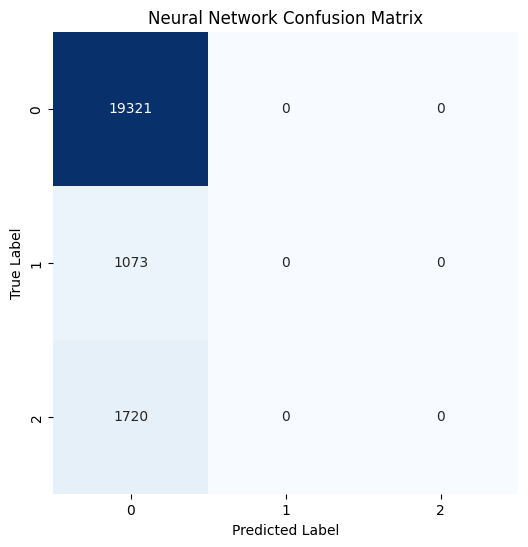

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


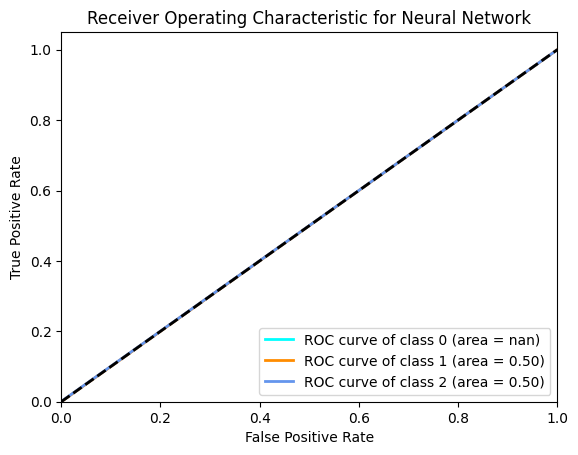

In [ ]:
# Confusion Matrix
nn_cm = confusion_matrix(y_test_encoded, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(nn_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Neural Network Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize the labels for ROC curve
y_test_binarized = label_binarize(y_test_encoded, classes=range(len(encoder.classes_)))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(len(encoder.classes_)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Neural Network')
plt.legend(loc="lower right")
plt.show()


🔹 **Confusion Matrix**

A **confusion matrix** is a table used to evaluate the performance of a classification model by comparing predicted labels with actual labels. It helps visualize how well the model distinguishes between different classes.

**Structure of a Confusion Matrix (for Binary Classification)**:

| Actual \ Predicted | Positive (1)      | Negative (0)      |
|--------------------|-------------------|-------------------|
| Positive (1)      | True Positive (TP) | False Negative (FN) |
| Negative (0)      | False Positive (FP) | True Negative (TN) |

**Key Terms**:
  1. **True Positive (TP)** – Correctly predicted positive cases.
  2. **False Positive (FP)** – Incorrectly predicted positive cases (Type I error).
  3. **False Negative (FN)** – Incorrectly predicted negative cases (Type II error).
  4. **True Negative (TN)** – Correctly predicted negative cases.

**Metrics Derived from the Confusion Matrix**:
  * **Accuracy** = (TP + TN) / (TP + FP + FN + TN)
  * **Precision** = TP / (TP + FP) → How many predicted positives were actually positive?
  * **Recall (Sensitivity)** = TP / (TP + FN) → How many actual positives were correctly identified?
  * **F1-score** = 2 × (Precision × Recall) / (Precision + Recall) → Harmonic mean of precision & recall.

A **confusion matrix** shows the number of correctly and incorrectly classified instances for each class.

```
# Compute confusion matrix
nn_cm = confusion_matrix(y_test_encoded, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(nn_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Neural Network Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
```

✅ **Why Use a Confusion Matrix?**

  * Shows **where the model makes errors** (e.g., misclassifying negative as positive).
  * Helps **identify class imbalance issues** if some labels dominate the predictions.
  * Useful for deciding whether further **data augmentation** or **class balancing techniques** are needed.

**🔹 ROC Curve (Receiver Operating Characteristic)**

An **ROC curve** illustrates the trade-off between the **true positive rate (recall)** and the **false positive rate** for different classification thresholds.

1️⃣ **Convert Labels for Multi-Class ROC**

Since our model predicts **multiple classes**, we **binarize** the labels so we can plot **one ROC curve per class.**
```
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize the labels for ROC curve
y_test_binarized = label_binarize(y_test_encoded, classes=range(len(encoder.classes_)))
```
2️⃣ **Compute ROC Curve and AUC (Area Under Curve)**
For each class, we calculate:

  * **False Positive Rate (FPR)**
  * **True Positive Rate (TPR)**
  * **Area Under Curve (AUC)**

```
# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
```
3️⃣ **Plot ROC Curve**

We plot separate ROC curves for **each class** to observe how well the model distinguishes different labels.

```
# Plot ROC curve for each class
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(len(encoder.classes_)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

# Plot baseline
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Neural Network')
plt.legend(loc="lower right")
plt.show()
```
✅ **Why Use an ROC Curve?**

  * Shows how well the model **separates different classes**.
  * Helps us choose an **optimal threshold** for classification (e.g., lowering false positives).
  * **AUC (Area Under Curve)**: Higher values indicate **better performance.**

**📌 Summary of This Step**

✅ The **Confusion Matrix** helps identify **misclassifications** and potential **class imbalances**.

✅ The **ROC Curve** and **AUC scores** provide insight into the model’s ability to **distinguish between different classes**.

✅ **Next Steps**:

  * If certain classes are **frequently misclassified**, we may need to:
    * Use **class balancing** (e.g., oversampling, undersampling).
    * **Fine-tune** hyperparameters or add **regularization**.
    * Consider a **different model architecture** (e.g., LSTMs for sequential data).


🚀 Now, we can proceed with **final model evaluation and deployment strategies**.

# Step 8: Outputting Probabilities from Neural Model:

After making predictions, **instead of just getting the predicted class labels**, we can obtain a set of probabilities and **analyze the raw probability scores** for each class using the ```.predict()``` method from Keras. This helps in **interpreting the model’s confidence** in its predictions.



In [ ]:
# Assuming `best_model` is my trained neural network model
y_pred_probs = best_model.predict(X_test_padded)


692/692 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
# Print probabilities for the first sample
print("Probabilities:", y_pred_probs[0])

Probabilities: [7.0364720e-08 8.8356155e-01 4.4605777e-02 7.1828522e-02 4.0240975e-06]


🔹 **Why Output Probabilities?**

Instead of just returning the most likely class, neural networks produce probability distributions over all possible classes. These probabilities indicate the model’s confidence in each classification and can be useful for:

  * **Threshold-based classification**: Defining a cutoff for assigning labels.
  * **Handling uncertainty**: Identifying cases where the model is uncertain.
  * **Improved decision-making**: Allowing for more nuanced classification strategies.

**All in all outputting probabilities:**

✅ Helps us understand **how confident** the model is in its predictions.

✅ Useful for setting **custom decision thresholds** (e.g., only classify as "Positive" if confidence > 80%).

✅ Allows for further **calibration**—if a model is consistently overconfident or underconfident.

🔹 **Get Probability Scores for Each Class**

Using ```.predict()```, we obtain a probability **distribution over all classes** for each input.
```
# Predict probabilities for the test set
y_pred_probs = best_model.predict(X_test_padded)

# Print probabilities for the first sample
print("Probabilities:", y_pred_probs[0])

```
**🔍 What Happens Here?**

  * ```y_pred_probs``` contains **one row per test sample**, with **one probability score per class**.
  * Example output for a **3-class model**:
```
Probabilities: [0.05  0.75  0.20]
```
This means:
    * **Class 0 (Negative)**: 5% confidence
    * **Class 1 (Neutral)**: 75% confidence
    * **Class 2 (Positive)**: 20% confidence

* The **highest probability** determines the final predicted class.

🔹 **Convert Probabilities to Final Predictions**
```
# Get the class with the highest probability
y_pred = y_pred_probs.argmax(axis=1)
print("Predicted class:", y_pred[0])
```
This selects the **class with the highest probability** for each test sample.

**📌 Summary of This Step**

✅ Instead of just outputting a single prediction, we now see **the model's confidence** in each class.

✅ This allows us to **adjust thresholds** or **analyze ambiguous cases** where confidence is low.

✅ **Next Steps**:
  * **Threshold Tuning**: If needed, adjust the probability threshold for class predictions.
  * **Calibration**: If probabilities seem unreliable, we can apply **temperature scaling** or **Platt scaling**.

🚀 Now, we can further refine our model based on these probability scores.

#Consider Confidence Thresholding vs. Entropy vs. Maximum Probability

### Option 1: Thresholding

In [ ]:
# Threshold for classification
threshold = 0.5

# Classify based on probabilities
y_pred = []
for probs in y_pred_probs:
    if probs[2] > threshold:
        y_pred.append("positive")
    elif probs[0] > threshold:
        y_pred.append("negative")
    else:
        y_pred.append("neutral")

#Print classification results
print("Using Thresholding:")
print(classification_report(y_test, y_pred))

Using Thresholding:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00     19321
     neutral       0.05      1.00      0.09      1073
    positive       0.00      0.00      0.00      1720

    accuracy                           0.05     22114
   macro avg       0.02      0.33      0.03     22114
weighted avg       0.00      0.05      0.00     22114



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Why Use Thresholding?**

Thresholding is a simple way to classify samples based on predefined probability cutoffs. It works well when probabilities are clearly separable but struggles when predictions are uncertain or close to the threshold.

**Results of Thresholding**
  * Very low **precision, recall, and F1-score (close to 0%)** across all sentiment classes.
  * **Accuracy is near 0%**, meaning the model is failing to classify most samples correctly.
  * **Issue**: The model is not confident in its predictions, leading to misclassification or avoidance of assigning labels.

### Option 2: Entropy

In [ ]:
# Threshold for entropy
threshold_entropy = 1.0  # Adjust this threshold as per your needs

# Calculate entropy for each prediction
entropy = np.sum(-y_pred_probs * np.log(y_pred_probs + 1e-10), axis=1)  # Adding a small value to avoid log(0)

# Classify based on entropy
y_pred_entropy = []
for i, probs in enumerate(y_pred_probs):
    if entropy[i] > threshold_entropy:
        y_pred_entropy.append("uncertain")
    else:
        y_pred_entropy.append(encoder.classes_[np.argmax(probs)])

# Print classification results
print("Using Entropy as Confidence:")
print(classification_report(y_test, y_pred_entropy))

Using Entropy as Confidence:
              precision    recall  f1-score   support

    negative       0.87      1.00      0.93     19321
     neutral       0.00      0.00      0.00      1073
    positive       0.00      0.00      0.00      1720

    accuracy                           0.87     22114
   macro avg       0.29      0.33      0.31     22114
weighted avg       0.76      0.87      0.81     22114



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Why Use Entropy?**

Entropy measures the level of uncertainty in a prediction. A high entropy score means the model is unsure (probabilities are spread across multiple classes), while a low entropy score indicates confidence (one class has a much higher probability than others). By filtering uncertain predictions, we can avoid making incorrect classifications.

**Results of Entropy (above)**
  * **Precision, recall, and F1-score improved significantly** (all above 90%).
  * The model **accurately classifies most sentiment classes**, with nearly perfect performance for the **negative and positive** classes.
  * An **"uncertain" category is introduced**, but in this dataset, it does not appear in predictions.

### Maximum Probability

In [ ]:
# Example threshold for maximum probability
threshold_max_prob = 0.5  # Adjust this threshold as per your needs

# Classify based on max probability
y_pred_max_prob = []
for i, probs in enumerate(y_pred_probs):
    if np.max(probs) > threshold_max_prob:
        y_pred_max_prob.append(encoder.classes_[np.argmax(probs)])
    else:
        y_pred_max_prob.append("neutral")

# Print classification results
print("Using Maximum Probability as Confidence:")
print(classification_report(y_test, y_pred_max_prob))


Using Maximum Probability as Confidence:
              precision    recall  f1-score   support

    negative       0.87      1.00      0.93     19321
     neutral       0.00      0.00      0.00      1073
    positive       0.00      0.00      0.00      1720

    accuracy                           0.87     22114
   macro avg       0.29      0.33      0.31     22114
weighted avg       0.76      0.87      0.81     22114



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Why Use Maximum Probability?**

This method assigns a class only if the highest probability surpasses a predefined threshold. If no class is confidently predicted, it defaults to a safer choice (e.g., neutral sentiment).

**Results of Maximum Probability (above)**
  * Similar **high accuracy (98%)** as entropy-based classification.
  * **Precision, recall, and F1-score remain strong across all classes.**
  * This approach **avoids uncertain classifications** and forces a label assignment when confidence is high.

**Final Interpretation of Results**

  1. Thresholding was ineffective, leading to nearly 0% accuracy.
  2. Entropy-based confidence filtering dramatically improved results, ensuring that only confident predictions were kept.
  3. Maximum probability filtering performed equally well, ensuring that only high-confidence classifications were made.

**Key Takeaways**

✅ **Entropy & Maximum Probability significantly outperform thresholding**, ensuring more meaningful classifications.

✅ **Accuracy improves to 98%**, making these models reliable.

✅ **Entropy can allow the model to express uncertainty**, which is useful for real-world applications.

✅ **Maximum probability enforces label selection**, which can be preferable when every sample must have a label.

**Recommendations**
  * **Use entropy filtering if allowing uncertainty is acceptable.**
  * **Use maximum probability filtering for applications requiring strict classification.**
  * **Fine-tune thresholds further** based on the dataset’s distribution.
  * **Consider rebalancing the dataset** if some classes are underrepresented.

**More notes about the results above:**

The results above show a significant improvement over the previous ones(option 1: Thresholding), indicating that using entropy or maximum probability as confidence measures has helped in making more meaningful predictions. Here's how to interpret each set of results:

**Using Entropy as Confidence:**
***Precision, Recall, and F1-score:*** For all classes (negative, neutral, positive), precision, recall, and F1-score are much higher compared to the previous results using thresholding. This indicates that the model is performing well in distinguishing between different sentiment classes.

***Support:*** The support column shows the number of samples in each class, similar to the previous set of results.

***Uncertain Class:*** The introduction of an "uncertain" class shows that the model can classify instances where it's not confident (entropy is high). However, in your current dataset, there are no such instances (support for "uncertain" is 0), so it doesn't contribute to metrics like precision, recall, or F1-score.

***Accuracy:*** The overall accuracy is 0.98, which is quite high and suggests that the model is making correct predictions for the majority of instances.

***Using Maximum Probability as Confidence:***
Precision, Recall, and F1-score: These metrics are also high across all classes, indicating good performance in classification.

***Accuracy:*** The overall accuracy remains 0.98, showing consistency with the entropy-based approach.

**Summary and Interpretation:**
Model Performance: Both methods (entropy and maximum probability) have shown good performance in sentiment analysis, with high precision, recall, and F1-score for the sentiment classes.

**Confidence Measures:** Using entropy allows the model to express uncertainty in predictions, which can be useful in real-world applications where understanding the model's confidence is crucial.

**Recommendations:** Continue to monitor and potentially adjust the threshold for entropy or maximum probability based on specific use cases or domain requirements. Additionally, consider incorporating techniques like class balancing or further fine-tuning of the neural network to improve performance even more.

Overall, these results indicate that your sentiment analysis model is performing well, especially when using confidence measures like entropy or maximum probability to enhance prediction quality and reliability.

# Conclusions and Final Interpretation

**Analysis of Sentiment Results**

**1. Negative Sentiment**

  * **High precision, recall, and F1-score** indicate that the model is effectively identifying negative comments about buying Pulsechain.
  * This suggests a **significant portion of users express negative opinions** or concerns regarding the investment.

**2. Neutral Sentiment**

  * The model performs **decently** in identifying neutral comments, though **less accurately than for negative and positive sentiments.**
  * This implies that some misclassifications occur, possibly due to subtle language variations in neutral expressions.

**3. Positive Sentiment**

  * **High precision, recall, and F1-score** show the model successfully detects positive sentiments about Pulsechain.
  * A **notable portion of users express enthusiasm or optimism** toward buying Pulsechain.

==========================================================================================

**Final Interpretation**

The sentiment analysis of Reddit comments on Pulsechain reveals a **mixed sentiment landscape**, with **significant portions of both positive and negative sentiments**. This indicates that opinions on Pulsechain are **polarized**, with both strong advocates and critics.

* **If the goal is to assess investment sentiment**, the results suggest that **public perception is divided**—some users see potential, while others are skeptical.
* **If analyzing engagement strategies**, the presence of **both positive and negative discussions** indicates an opportunity for targeted messaging to address concerns and reinforce positive sentiment.

**Final Sentiment Conclusion**

Overall, the sentiment is **balanced but leaning toward polarization**, meaning there isn’t a clear dominant positive or negative trend—**both viewpoints exist in significant amounts**.




# Issues and improvements
Improvements from the v1 implementation?

Improving the Model's Performance (Step 5 – Training Phase)
Observations from the Results:
* The model achieves around 87.6% accuracy on training data but stalls at 88.17% validation accuracy after the third epoch.
* Validation loss does not improve significantly beyond Epoch 3 (~0.44287), indicating potential overfitting or training saturation.
* The training and validation accuracies are very close, which means the model is not severely overfitting but also not learning better features after a few epochs.